In [41]:
import glob
import matplotlib.pyplot as plt
import MDAnalysis
import numpy as np
plt.rcdefaults()
#print(plt.rcParams['font.family'])
#print(plt.rcParams['font.sans-serif'])
#plt.rcParams.update({'font.family':'sans-serif'})
#plt.rcParams.update({'font.sans-serif':'Arial'})
#plt.rcParams['font.family'] = "sans-serif"
#plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

In [21]:
af_unrelaxed_specs_files = glob.glob('/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/*/unrelaxed_model_*_specs.out')
af_relaxed_specs_files = glob.glob('/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/*/relaxed_model_*_specs.out')
omm_gpu_relaxed_specs_files = glob.glob('/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/*/model_*_specs.out')
omm_cpu_relaxed_specs_files = glob.glob('/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/*/cpu_relaxation/model_*_specs.out')

af_unrelaxed_specs_files.sort()
af_relaxed_specs_files.sort()
omm_gpu_relaxed_specs_files.sort()
omm_cpu_relaxed_specs_files.sort()

print(len(af_unrelaxed_specs_files),len(af_relaxed_specs_files),len(omm_gpu_relaxed_specs_files),len(omm_cpu_relaxed_specs_files))

95 95 95 95


In [22]:
def specs_parser(results_file):
    """
    returns a list with four elements (nRes, RMSD, SPECS-score, TM-score)
    """
    with open(results_file,'r') as results:
        data = []
        for line in results:
            if 'Number of residues in common' in line:
                data.append(float(line.rstrip().split()[-1]))
            elif 'RMSD of common residues' in line:
                data.append(float(line.rstrip().split()[-1]))
            elif 'SPECS-score ' in line:
                data.append(float(line.split()[2]))
            elif 'TM-score ' in line:
                data.append(float(line.split()[2]))
    return data

In [23]:
af_unrelaxed_specs = []
for file in af_unrelaxed_specs_files:
    print(file)
    af_unrelaxed_specs.append(specs_parser(file))
af_unrelaxed_specs = np.array(af_unrelaxed_specs)
print(af_unrelaxed_specs)

/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/unrelaxed_model_1_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/unrelaxed_model_2_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/unrelaxed_model_3_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/unrelaxed_model_4_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/unrelaxed_model_5_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1029/unrelaxed_model_1_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1029/unrelaxed_model_2_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1029/unrelaxed_model_3_specs.out
/gpfs/alpine/world-share

In [24]:
af_relaxed_specs = []
for file in af_relaxed_specs_files:
    print(file)
    af_relaxed_specs.append(specs_parser(file))
af_relaxed_specs = np.array(af_relaxed_specs)
print(af_relaxed_specs)

/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/relaxed_model_1_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/relaxed_model_2_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/relaxed_model_3_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/relaxed_model_4_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/relaxed_model_5_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1029/relaxed_model_1_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1029/relaxed_model_2_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1029/relaxed_model_3_specs.out
/gpfs/alpine/world-shared/bif135/alphafo

In [25]:
omm_gpu_relaxed_specs_files
omm_gpu_relaxed_specs = []
for file in omm_gpu_relaxed_specs_files:
    print(file)
    omm_gpu_relaxed_specs.append(specs_parser(file))
omm_gpu_relaxed_specs = np.array(omm_gpu_relaxed_specs)
print(omm_gpu_relaxed_specs)

/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/model_1_min_00_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/model_2_min_00_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/model_3_min_00_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/model_4_min_00_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/model_5_min_00_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1029/model_1_min_00_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1029/model_2_min_00_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1029/model_3_min_00_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsum

In [26]:
omm_cpu_relaxed_specs_files
omm_cpu_relaxed_specs = []
for file in omm_cpu_relaxed_specs_files:
    print(file)
    omm_cpu_relaxed_specs.append(specs_parser(file))
omm_cpu_relaxed_specs = np.array(omm_cpu_relaxed_specs)
print(omm_cpu_relaxed_specs)

/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/cpu_relaxation/model_1_min_00_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/cpu_relaxation/model_2_min_00_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/cpu_relaxation/model_3_min_00_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/cpu_relaxation/model_4_min_00_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1027/cpu_relaxation/model_5_min_00_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1029/cpu_relaxation/model_1_min_00_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_test/casp14/af_reduced_db/T1029/cpu_relaxation/model_2_min_00_specs.out
/gpfs/alpine/world-shared/bif135/alphafold_onsummit/alphafold_

In [27]:
print('TM-score results')
print('AF2 unrelaxed statistics:', np.mean(af_unrelaxed_specs[:,3]),np.std(af_unrelaxed_specs[:,3]))
print('AF2 relaxed statistics:', np.mean(af_relaxed_specs[:,3]),np.std(af_relaxed_specs[:,3]))
print('OPENMM GPU relaxed statistics:', np.mean(omm_gpu_relaxed_specs[:,3]),np.std(omm_gpu_relaxed_specs[:,3]))
print('OPENMM GPU relaxed statistics:', np.mean(omm_cpu_relaxed_specs[:,3]),np.std(omm_cpu_relaxed_specs[:,3]))


TM-score results
AF2 unrelaxed statistics: 0.6774494736842106 0.26577438903728856
AF2 relaxed statistics: 0.6768063157894737 0.26619055454416835
OPENMM GPU relaxed statistics: 0.677118947368421 0.2659932105563032
OPENMM GPU relaxed statistics: 0.6771126315789473 0.26601161677922236


In [28]:
print('SPECS-score results')
print('AF2 unrelaxed statistics:', np.mean(af_unrelaxed_specs[:,2]),np.std(af_unrelaxed_specs[:,2]))
print('AF2 relaxed statistics:', np.mean(af_relaxed_specs[:,2]),np.std(af_relaxed_specs[:,2]))
print('OPENMM GPU relaxed statistics:', np.mean(omm_gpu_relaxed_specs[:,2]),np.std(omm_gpu_relaxed_specs[:,2]))
print('OPENMM GPU relaxed statistics:', np.mean(omm_cpu_relaxed_specs[:,2]),np.std(omm_cpu_relaxed_specs[:,2]))

SPECS-score results
AF2 unrelaxed statistics: 0.40004736842105265 0.1620262862638134
AF2 relaxed statistics: 0.4200652631578947 0.17282640013269235
OPENMM GPU relaxed statistics: 0.42035684210526325 0.1728473452760414
OPENMM GPU relaxed statistics: 0.42029263157894736 0.1728959731302431


In [29]:
print('RMSD results')
print('AF2 unrelaxed statistics:', np.mean(af_unrelaxed_specs[:,1]),np.std(af_unrelaxed_specs[:,1]))
print('AF2 relaxed statistics:', np.mean(af_relaxed_specs[:,1]),np.std(af_relaxed_specs[:,1]))
print('OPENMM GPU relaxed statistics:', np.mean(omm_gpu_relaxed_specs[:,1]),np.std(omm_gpu_relaxed_specs[:,1]))
print('OPENMM GPU relaxed statistics:', np.mean(omm_cpu_relaxed_specs[:,1]),np.std(omm_cpu_relaxed_specs[:,1]))

RMSD results
AF2 unrelaxed statistics: 7.83583157894737 5.603410325587222
AF2 relaxed statistics: 7.849368421052631 5.613410381075945
OPENMM GPU relaxed statistics: 7.845284210526316 5.609996145346566
OPENMM GPU relaxed statistics: 7.8452947368421055 5.61009960484554


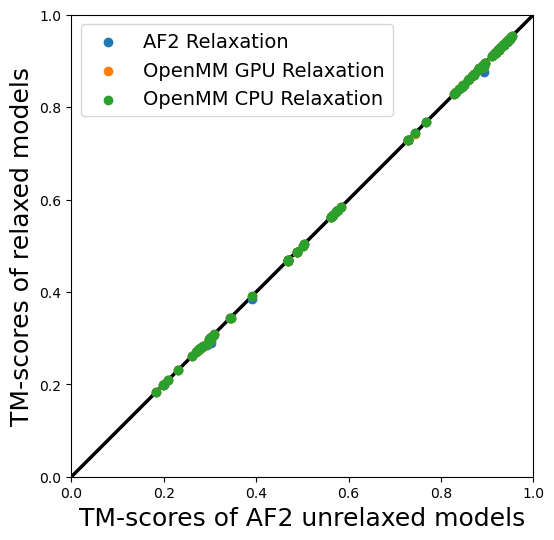

In [42]:
fig = plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k-',lw=2.5,zorder=1)
ax = plt.gca()
ax.set_aspect('equal')
plt.xlim((0,1))
plt.ylim((0,1))
plt.scatter(af_unrelaxed_specs[:,3],af_relaxed_specs[:,3],label='AF2 Relaxation',zorder=2) #,'.',c='b')
plt.scatter(af_unrelaxed_specs[:,3],omm_gpu_relaxed_specs[:,3], label='OpenMM GPU Relaxation',zorder=2) #,'.',c='b')
plt.scatter(af_unrelaxed_specs[:,3],omm_cpu_relaxed_specs[:,3], label='OpenMM CPU Relaxation',zorder=2) #,'.',c='b')
plt.xlabel('TM-scores of AF2 unrelaxed models',size=18)
plt.ylabel('TM-scores of relaxed models',size=18)
plt.legend(fontsize=14)
plt.savefig('CASP14_tmscores_relaxed_vs_unrelaxed.png',transparent=True,dpi=600)
plt.show()

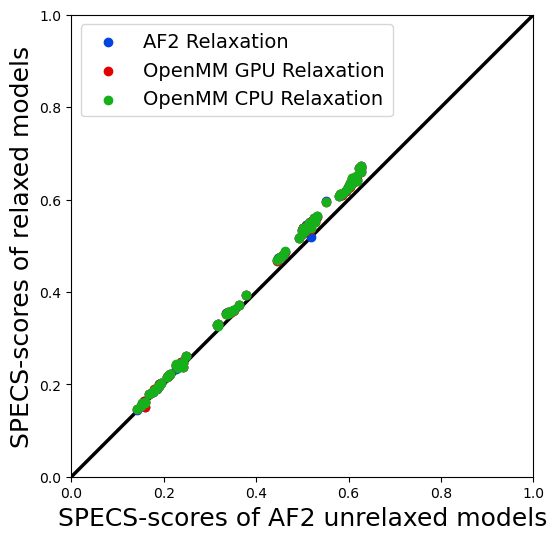

In [43]:
fig = plt.figure(figsize=(6,6))
plt.plot([0,1],[0,1],'k-',lw=2.5,zorder=1)
ax = plt.gca()
ax.set_aspect('equal')
plt.xlim((0,1))
plt.ylim((0,1))
plt.scatter(af_unrelaxed_specs[:,2],af_relaxed_specs[:,2],label='AF2 Relaxation',zorder=2,facecolor='xkcd:blue')#,alpha=0.5) #,'.',c='b')
plt.scatter(af_unrelaxed_specs[:,2],omm_gpu_relaxed_specs[:,2], label='OpenMM GPU Relaxation',zorder=2,facecolor='xkcd:red')#,alpha=0.5) #,'.',c='b')
plt.scatter(af_unrelaxed_specs[:,2],omm_cpu_relaxed_specs[:,2], label='OpenMM CPU Relaxation',zorder=2,facecolor='xkcd:green')#,alpha=0.5) #,'.',c='b')
plt.xlabel('SPECS-scores of AF2 unrelaxed models',size=18)
plt.ylabel('SPECS-scores of relaxed models',size=18)
plt.legend(fontsize=14)
plt.savefig('CASP14_specsscores_relaxed_vs_unrelaxed.png',transparent=True,dpi=600)
plt.show()

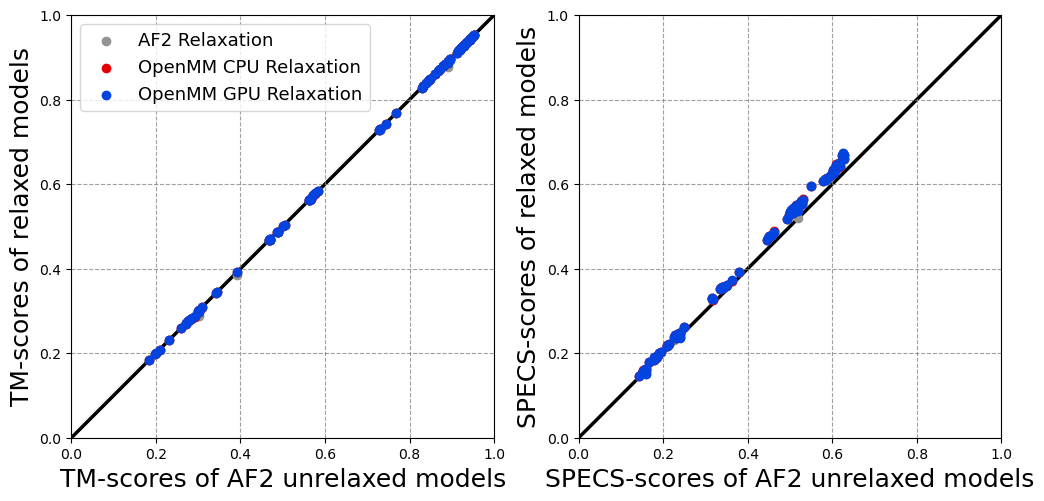

In [47]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(12,6))
ax1.plot([0,1],[0,1],'k-',lw=2.5,zorder=1)
ax1.set_aspect('equal')
ax1.set_xlim((0,1))
ax1.set_ylim((0,1))
ax1.scatter(af_unrelaxed_specs[:,3],af_relaxed_specs[:,3],label='AF2 Relaxation',zorder=2,color='xkcd:grey')
ax1.scatter(af_unrelaxed_specs[:,3],omm_cpu_relaxed_specs[:,3], label='OpenMM CPU Relaxation',zorder=2,color='xkcd:red')
ax1.scatter(af_unrelaxed_specs[:,3],omm_gpu_relaxed_specs[:,3], label='OpenMM GPU Relaxation',zorder=2,color='xkcd:blue')
ax1.set_xlabel('TM-scores of AF2 unrelaxed models',size=18,fontname='Arial')
ax1.set_ylabel('TM-scores of relaxed models',size=18,fontname='Arial')
ax1.legend(fontsize=13)

ax2.plot([0,1],[0,1],'k-',lw=2.5,zorder=1)
ax2.set_aspect('equal')
ax2.set_xlim((0,1))
ax2.set_ylim((0,1))
ax2.scatter(af_unrelaxed_specs[:,2],af_relaxed_specs[:,2],label='AF2 Relaxation',zorder=2,color='xkcd:grey')
ax2.scatter(af_unrelaxed_specs[:,2],omm_cpu_relaxed_specs[:,2], label='OpenMM CPU Relaxation',zorder=2,color='xkcd:red')
ax2.scatter(af_unrelaxed_specs[:,2],omm_gpu_relaxed_specs[:,2], label='OpenMM GPU Relaxation',zorder=2,color='xkcd:blue')
ax2.set_xlabel('SPECS-scores of AF2 unrelaxed models',size=18,fontname='Arial')
ax2.set_ylabel('SPECS-scores of relaxed models',size=18,fontname='Arial')

ax1.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
ax2.grid(b=True,which='major',axis='both',color='#808080',linestyle='--',alpha=0.75,zorder=1)
plt.savefig('combined_CASP14_tmscores_relaxed_vs_unrelaxed.png',transparent=True,dpi=600)
plt.show()